In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [2]:
import tensorflow
adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

C:\Users\atila\miniconda3\envs\JupyterProject\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 40, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)



train_set = train_datagen.flow_from_directory('train', target_size=(64,64), batch_size=32, class_mode='binary')


test_set = test_datagen.flow_from_directory('test', target_size=(64,64), batch_size = 32, class_mode='binary', shuffle=False)

Found 20000 images belonging to 2 classes.
Found 2331 images belonging to 2 classes.


In [6]:
train_set.samples

20000

In [7]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))

classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 

classifier.add(Conv2D(32,(3,3),activation = 'relu'))

classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))

classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
# model.fit(train_generator, steps_per_epoch=train_generator.samples/train_generator.batch_size, 
#           epochs=10, validation_data=validation_generator, 
#           validation_steps=validation_generator.samples/validation_generator.batch_size)

# in each epoch, each training sample is augmented only one time

In [9]:
classifier.fit(train_set, steps_per_epoch = 625, epochs = 5,  validation_data = test_set, validation_steps = 312)

Epoch 1/5


ValueError: None values not supported.

In [9]:
classifier.save('dogcat_model.h5')

In [10]:
from tensorflow.keras.models import load_model

In [11]:
classifier = load_model('dogcat_model.h5')

In [12]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 1s 597ms/step


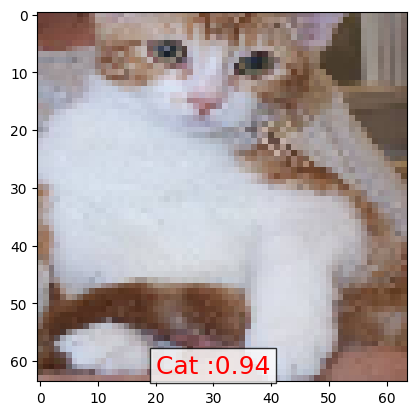

In [13]:
img1 = image.load_img('test/Cats/cat.9.jpg', target_size=(64, 64))

img = image.img_to_array(img1)

img = img/255

img = np.expand_dims(img, axis=0)

prediction = classifier.predict(img, batch_size=None,steps=1) 

if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

    
plt.imshow(img1)
plt.show()
